In [1]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
# breast cancer data

data = pd.read_csv('./breast_cancer_data.csv')

In [4]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
data.shape

(569, 31)

In [8]:
X = data.drop('diagnosis', axis=1)
Y = data['diagnosis']

X.shape, Y.shape

((569, 30), (569,))

In [9]:
# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [11]:
# Encode Diagnosis
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [14]:
type(x_train)


numpy.ndarray

In [15]:
x_train_tensor = torch.from_numpy(x_train)

print(type(x_train_tensor))
x_train_tensor

<class 'torch.Tensor'>


tensor([[-1.4480, -0.4560, -1.3667,  ...,  0.9196,  2.1472,  1.8594],
        [ 1.9775,  1.6942,  2.0896,  ...,  2.6752,  1.9369,  2.4635],
        [-1.4071, -1.2635, -1.3498,  ..., -0.9705,  0.6168,  0.0529],
        ...,
        [ 0.0462, -0.5747, -0.0687,  ..., -1.2376, -0.7163, -1.2605],
        [-0.0418,  0.0769, -0.0350,  ...,  1.0368,  0.4501,  1.1944],
        [-0.5531,  0.2863, -0.6075,  ..., -0.6136, -0.3345, -0.8404]],
       dtype=torch.float64)

In [17]:
y_train_tensor = torch.from_numpy(y_train)

print(type(y_train_tensor))
y_train_tensor

<class 'torch.Tensor'>


tensor([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [18]:
x_train_tensor.size()

torch.Size([455, 30])

In [19]:
# Simple NN model

class MyNNClassifier:

    def __init__(self):
        self.weights = torch.rand(X.shape[1], 1, requires_grad=True, dtype=torch.float64)
        self.bias = torch.rand(1, requires_grad=True, dtype=torch.float64)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        z = torch.matmul(x, self.weights) + self.bias
        y_prediction = torch.sigmoid(z)
        return y_prediction

    @staticmethod
    def binary_loss_function(y_prediction , y_target):
        epsilon = 1e-7
        y_prediction = torch.clamp(y_prediction, epsilon, 1 - epsilon)

        bcs_loss = -(y_target * torch.log(y_prediction) + (1 - y_target) * torch.log(1 - y_prediction)).mean()
        return bcs_loss


In [20]:
learning_rate = 0.01
epochs = 1000

In [21]:
model = MyNNClassifier()

training_loss = []

for epoch in range(epochs):

    # forward pass
    y_pred = model.forward(x_train_tensor)

    # loss
    loss = model.binary_loss_function(y_pred, y_train_tensor)

    # backward pass
    loss.backward()

    # update parameters
    with torch.no_grad():
        model.weights -= learning_rate * model.weights.grad
        model.bias -= learning_rate * model.bias.grad

    # zero gradients
    model.weights.grad.zero_()
    model.bias.grad.zero_()

    training_loss.append((epoch + 1, loss.item()))
    print(f"Epoch {epoch + 1}, loss: {loss.item()}")




Epoch 1, loss: 2.772940693986167
Epoch 2, loss: 2.757552499378816
Epoch 3, loss: 2.7417074841943627
Epoch 4, loss: 2.7251281299863646
Epoch 5, loss: 2.70858169760158
Epoch 6, loss: 2.692068770042254
Epoch 7, loss: 2.675589940263194
Epoch 8, loss: 2.65914581129769
Epoch 9, loss: 2.642736996391484
Epoch 10, loss: 2.6263641191252587
Epoch 11, loss: 2.6100278135432715
Epoch 12, loss: 2.5937287242956484
Epoch 13, loss: 2.5774675067633304
Epoch 14, loss: 2.5612448271956687
Epoch 15, loss: 2.545061362854106
Epoch 16, loss: 2.5289178021509677
Epoch 17, loss: 2.512754545570409
Epoch 18, loss: 2.4963037606145924
Epoch 19, loss: 2.4796317540047466
Epoch 20, loss: 2.4630042377424517
Epoch 21, loss: 2.446422005919265
Epoch 22, loss: 2.4298255801455633
Epoch 23, loss: 2.4130136593855385
Epoch 24, loss: 2.3962501978012467
Epoch 25, loss: 2.3795360684785316
Epoch 26, loss: 2.3628721591977837
Epoch 27, loss: 2.3462593726594103
Epoch 28, loss: 2.3296986266865956
Epoch 29, loss: 2.313190854454364
Epoch 3

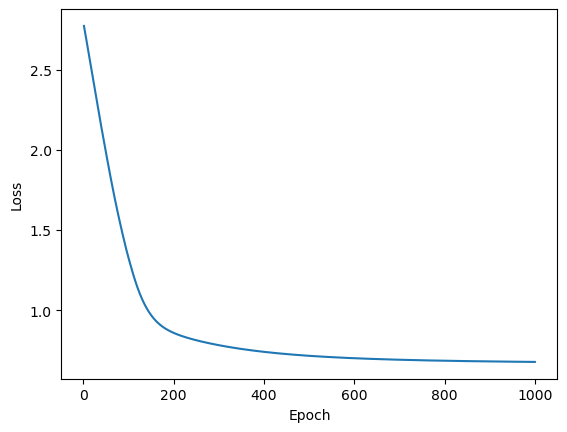

In [22]:
x_axis = [training_loss[i][0] for i in range(len(training_loss))]
y_axis = [training_loss[i][1] for i in range(len(training_loss))]

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x_axis, y_axis)

In [24]:
# test the model accuracy
x_test_tensor = torch.from_numpy(x_test)
y_test_tensor = torch.from_numpy(y_test)

with torch.no_grad():
    y_pred = model.forward(x_test_tensor)
    y_pred = (y_pred > 0.5).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 60.56%
